<a href="https://colab.research.google.com/github/Lucy-Moctezuma/SFSU-CodeLab-Work-/blob/main/MARC%20Machine%20Learning%20Project/1_COVID_19_Data_with_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WELCOME to the coding portion for the Introduction to Machine Learning Workshop!**

This notebook was created by Lucy Moctezuma Tan, Florentine van Nouhuijs, Lorena Benitez-Rivera (SFSU master students and CoDE lab members) and Pleuni Pennings (SFSU bio professor). Special Acknowledgement to Faye Orcales for pulling the Covid Data tables from Government Websites.

**Data sources:**
- [Covid cases data (California Health and Human Services Agency)](https://data.chhs.ca.gov/dataset/covid-19-time-series-metrics-by-county-and-state/resource/046cdd2b-31e5-4d34-9ed3-b48cdbc4be7a)
- [Covid Vaccination data (Los Angeles Times)](https://github.com/datadesk/california-coronavirus-data)
- [Unemployment data (California Employment Development Dept.)](https://data.edd.ca.gov/Labor-Force-and-Unemployment-Rates/Local-Area-Unemployment-StatisticsdecisionLAUS-/e6gw-gvii)
- [Election data (Harvard University)](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ)

# **Introduction Video:**

It's important to note that there are other Machine Learning Techniques, but the aim of this notebook will be to have a basic understanding of one of the fundamental techniques used: Decision Tree. This is ideal because Decision Trees are the basis for more complex models such as Boosted Trees or Random Forests. Below we have a general introduction video to Machine Learning by Lorena Benitez.

In [1]:
from IPython.display import HTML
HTML('<iframe src="https://player.vimeo.com/video/721612530?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/721612530">Welcome Video</a> from <a href="https://vimeo.com/showcase/9557969/video/721612530">Introduction to Machine Learning: Decision Trees</a> on <a href="https://vimeo.com">Vimeo</a>.</p>')

#OBJECTIVE OF THIS EXERCISE:

We are going to be working with **COVID data** from the 58 Counties of California during Summer 2020 (July, August and September).  

**Remember the complete dataset with 58 counties from the previous video of this workshop?** 

Let's now imagine that we did not know the **cases per 100 000 people** for the last 18 counties of the datataset. 

![picture](https://drive.google.com/uc?export=view&id=1XfQuK5TQkbEr7S_y9HrlhzpQNYverE8u)

**The Objective** of this exercise will be to make predictions for these missing values in the column **cases per 100 000 people** based solely on the data that we do have available.

The information that we still have available for these 18 counties are:

*   Population
*   Vaccination Percentage (Partial and Fully vaccinated)
*   Unemployment Rates
*   Partisan Voting Percentage (Democrat, Green, Republican, Libertarian and Other)

In order to do this, we will be creating a **DECISION TREE**



In [2]:
HTML('<iframe src="https://player.vimeo.com/video/747875559?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/747875559">Notebook Objectives</a> from <a href="https://vimeo.com/showcase/9807396/video/747875559"><a href="https://vimeo.com">Vimeo</a>.</p>')

#WHAT IS A DECISION TREE?

 A **Decision Tree** is a supervised machine learning model that allows us to make predictions by learning simple decision rules that are inferred using available information in the dataset. 
 
- A Decision Tree is called a **"Supervised"**  model because we know exactly what we want to figure out. For example, for our Decision Tree, we will specify that we want to figure out the missing values of the column **"Cases per 100 000 people"**, and our model will try to find these values by making predictions for them using the the information we do have available.

- In contrast, in an **"Unsupervised"**  model, we do not know exactly what we want to predict for. Instead, an Unsupervised model finds hidden relationships between different types of information and can group them based on similaries. For example, Netflix surprising you with a new show you like.

A **Decision Tree** can be pictured as a tree-like flowchart, where we start with a particular criteria and based on whether this is True (Y for Yes) or False (N for No), we chose only one of the branches. This process is then repeated at every decision until we reach the bottom of the tree, where we end up with a specific prediction. 

![DT.png](https://drive.google.com/uc?export=view&id=1J2p8SVgo4H5br-lSFu9wiHCxH5rCxHHN)

We will see how a Decision Tree can help us predict the missing **cases per 100 000 people** in more detail later on in this tutorial.

You can find more information about different ways to clasify machine learning models here: [Machine Learning Models](https://www.geeksforgeeks.org/introduction-machine-learning/?ref=lbp)

You can find more information about Decision Trees here: [Scikit-learn](https://scikit-learn.org/stable/modules/tree.html)

##**Step 1) Importing necessary packages into Google Colab**

Before working on our model we need to import all Packages and specific Functions that we will need to use in order to work with our data.

- **Packages** are essentially prepackaged code that others have made, that are often organized in chunks of code called modules, A package can contain many modules and these modules may contain several functions. 

- **Functions** are essentially a set of instructions to a computer that specify how to handle different types of files, what mathematical equations are used to calculate our model, how our graphs are going to be displayed, etc. 

The code in this notebook is organized in **Cells**

In [3]:
HTML('<iframe src="https://player.vimeo.com/video/747875607?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/747875607">Step 1</a> from <a href="https://vimeo.com/showcase/9807396/video/747875607"><a href="https://vimeo.com">Vimeo</a>.</p>')


In the example below we will learn how to execute or "run" each of the three cells, so that our code actually takes effect.

**Note**: `The lines of green text that are preceded by a "#" are called comments, they exist only to provide explanations of what each line or chunk of code does. They are not actually part of the code.`

In [4]:
# Data Wrangling Imports
import pandas as pd
import numpy as np

In [5]:
# Machine Learning Models Imports
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 

In [6]:
# Model Evaluation Imports and Visualization
from matplotlib import pyplot as plt
import graphviz

In [7]:
# Quantitative metrics of Model performance
from sklearn.metrics import mean_squared_error

##**Step 2) Loading Training data and making sure it looks correct**

Now that we have our tools, we can now examine our Dataset again. 

Recall that we are missing the last 18 values of in the column "cases_per 100 000", but we still have a big chunk of complete data (40 rows). This chunk of complete information is often referred to as **Training Data**.

![picture_2](https://drive.google.com/uc?export=view&id=1wzhfJBfyQMis75U7aK9Dva4lI71hkySN)

**Training Data** is a machine learning terminology that refers to the Dataset used to teach our Decision Tree to make the predictions for our missing values using available data.


In [8]:
HTML('<iframe src="https://player.vimeo.com/video/747875643?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/747875643">Step 2</a> from <a href="https://vimeo.com/showcase/9807396/video/747875643"><a href="https://vimeo.com">Vimeo</a>.</p>')

**A)** Let's start by Loading our Training Data into the Notebook:


In [9]:
#this opens the file that contains the training data, data used to train the algorithm 
S2020_training= pd.read_csv("https://raw.githubusercontent.com/MarcMachineLearning/Workshop_1/main/Datasets/S2020_training.csv")

**B)** Make sure that your dataset is loaded correctly, it should contain the county names and all the data highlighted in green shown in our last picture:

In [10]:
#this will display the entire dataset 
S2020_training

,county,cases_per_100000,population,partially_vaccinated_percent,fully_vaccinated_percent,2020_Unemployment_Rate,democrat_votes_percent,green_votes_percent,republican_votes_percent,libertarian_votes_percent,other_votes_percent
0,Santa Barbara,1197.485390,456373,0.000009,0.000002,0.095716,0.648715,0.004687,0.328124,0.012060,0.006414
1,Madera,2293.099463,160089,0.000000,0.000000,0.123558,0.431177,0.004039,0.546751,0.011557,0.006477
2,Placer,681.011103,400434,0.000021,0.000021,0.093818,0.454599,0.003314,0.521039,0.016794,0.004254
3,Stanislaus,2214.286603,562303,0.000015,0.000006,0.128845,0.492389,0.003452,0.484499,0.011602,0.008058
4,Sutter,1388.219051,105747,0.000010,0.000000,0.116883,0.407255,0.003189,0.571593,0.012217,0.005745
5,Tuolumne,347.653340,52351,0.000018,0.000000,0.122156,0.393909,0.004768,0.581722,0.014437,0.005163
6,Kings,3339.214032,156444,0.000000,0.000000,0.124113,0.426324,0.002850,0.548825,0.013771,0.008231
7,Fresno,2041.992701,1032227,0.000005,0.000002,0.129932,0.528956,0.004039,0.450689,0.011046,0.005270
8,Napa,924.440753,139652,0.000007,0.000007,0.106322,0.690464,0.004297,0.286570,0.012668,0.006001
9,Monterey,1767.870355,448732,0.000002,0.000000,0.103967,0.695162,0.004569,0.282444,0.011103,0.006723


**C)** We can sneak a peak at what our first 5 rows look like, if your dataset is too big to be displayed.

In [11]:
#this will display only the first 5 rows of our dataset
S2020_training.head()

,county,cases_per_100000,population,partially_vaccinated_percent,fully_vaccinated_percent,2020_Unemployment_Rate,democrat_votes_percent,green_votes_percent,republican_votes_percent,libertarian_votes_percent,other_votes_percent
0,Santa Barbara,1197.485390,456373,0.000009,0.000002,0.095716,0.648715,0.004687,0.328124,0.012060,0.006414
1,Madera,2293.099463,160089,0.000000,0.000000,0.123558,0.431177,0.004039,0.546751,0.011557,0.006477
2,Placer,681.011103,400434,0.000021,0.000021,0.093818,0.454599,0.003314,0.521039,0.016794,0.004254
3,Stanislaus,2214.286603,562303,0.000015,0.000006,0.128845,0.492389,0.003452,0.484499,0.011602,0.008058
4,Sutter,1388.219051,105747,0.000010,0.000000,0.116883,0.407255,0.003189,0.571593,0.012217,0.005745


**D)** Here we can see how many rows and columns the complete dataset actually has. In our example we should have (40 rows, 11 columns)

In [12]:
#this will display only the number of rows (not including the title of the columns) and number of colums of our dataset
S2020_training.shape

(40, 11)

##**Step 3) Separate the Training Dataset into features and labels**

In [13]:
HTML('<iframe src="https://player.vimeo.com/video/747875687?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/747875687">Step 3</a> from <a href="https://vimeo.com/showcase/9807396/video/747875687"><a href="https://vimeo.com">Vimeo</a>.</p>')

Recall that a Decision Tree is a **Supervised** Machine learning model, therefore we need to specify clearly what we are trying to predict.

To do this we need to devide the Training Data into **Label** and **Features**

![picture_3](https://drive.google.com/uc?export=view&id=14mYGS3Vka7XvzIBhRuikfLiljkrR0WDE)

- The RED outlined column is called a **LABEL**. This is a machine learning term that refers to the data that our model will learn to predict.

- The BLUE outlined columns are called **FEATURES**, which is the term that refers to the columns we would like to use to predict our chosen LABEL. 

Because the **Training Data** is complete, We can clearly separate LABEL from FEATURES. Remember that the Training Data is only the red and blue shaded regions of our Dataset. 

We can ignore the rest of the Dataset for now.

**A)** Separate the Training Data into FEATURES and LABELS:

In [14]:
#On the other hand the label will only include summer_2020 cases per 100 000
S2020_training_labels = S2020_training["cases_per_100000"]

#Notice that in this code we are droping the "county" column, because it does not contribute with our predictions and "cases_per_100000" because that is our label
S2020_training_features = S2020_training.drop(columns=["county","cases_per_100000"])

**B)** Run the **LABEL** to check that the separation was correctly performed (you should see 40 rows and just 1 column):

In [15]:
#This code allows you to see what the labels look like as a dataframe, after being separated from the training data
S2020_training_labels = pd.DataFrame(S2020_training_labels,columns = ["cases_per_100000"])

# This code tells you how many rows and columns this dataset has
S2020_training_labels.shape

(40, 1)

**C)** Run the **FEATURES** to check that the separation was correctly performed (you should see all 40 rows and 9 columns only since we dropped the columns of "county" and "cases_per_100000")

In [16]:
# This code shows
S2020_training_features.shape

(40, 9)

##**Step 4) Create a Decision tree object and Train it**

After separating our Training data into FEATURES and LABELS, we can now create a Decision Tree.

In [17]:
HTML('<iframe src="https://player.vimeo.com/video/747875711?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/747875711">Step 4</a> from <a href="https://vimeo.com/showcase/9807396/video/747875711"><a href="https://vimeo.com">Vimeo</a>.</p>')

 

**A)** Create a Decision Tree Object

In [18]:
#This line creates the Decison Tree with your chosen specifications (what is written within the parenthesis)
dtr_summer2020 = DecisionTreeRegressor(random_state = 1, max_depth= 3)

**B)** Train our Decision Tree using the Training data we separated in the previous step

In [19]:
# This line trains the decision tree using both the features and the labels from our training data
dtr_summer2020 = dtr_summer2020.fit(S2020_training_features,S2020_training_labels)

##**Step 5) Visualize our trained Decision Tree**

In [20]:
HTML('<iframe src="https://player.vimeo.com/video/747875740?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/747875740">Step 5</a> from <a href="https://vimeo.com/showcase/9807396/video/747875740"><a href="https://vimeo.com">Vimeo</a>.</p>')

Visualize our decision tree by graphing it using the following code 

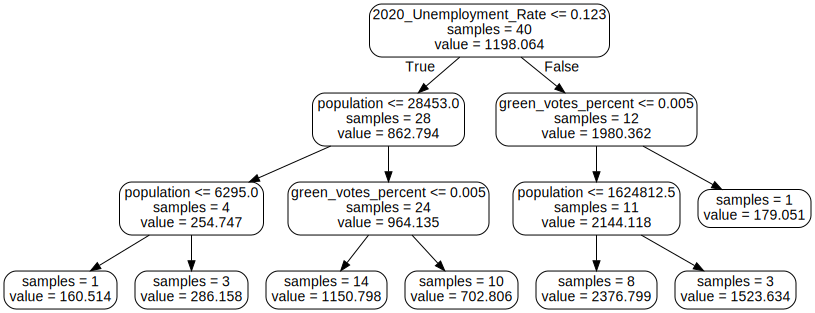

In [21]:
# Initialize tree data object 
dtr_summer2020_dot = tree.export_graphviz(dtr_summer2020, out_file=None, 
                                feature_names=S2020_training_features.columns,  
                                filled=False, rounded=True, impurity=False)

# Draw graph
dtr_graph = graphviz.Source(dtr_summer2020_dot, format="png") 
dtr_graph

###Let's try to understand what our tree learned!

- **NODES** contain the Decision that must be made based on a particular criteria. You can see that nodes have 2 arrows pointing away from them. All arrows to the LEFT are taken when the criteria is satisfied, and all arrows to the RIGHT are taken when this criteria is not satisfied.

- **ROOT NODE**, this node is what our model determined as the most important feature to consider when making our predictions. It tells you the feature that best splits the data and it's located at the top of the tree.

- **LEAVES** contain the final outcome of the Decision path. You can see that leaves do not have arrows pointing away from them.



##**Step 6) Make predictions using Testing data with our trained Decision Tree**

We are now ready to make predictions for the counties that had the missing labels.

**Below is an image showing what constitutes the Testing Data in our example**

![picture_3](https://drive.google.com/uc?export=view&id=13xIeMReBo9HewaItRZroOIwyZqqXXrfL)
 

In Machine learning we usually call the part of the dataset that only contains the FEATURE columns as **Testing Data**. 

The **Testing Data** is the dataset that is used to predict the missing values of the LABEL column, based on the rules learned during the training phase.

Recall that our Decision Tree Model has only been taught using the Training data (40 counties) and has never seen any of the columns of the Testing data (18 counties).


In [22]:
HTML('<iframe src="https://player.vimeo.com/video/747875773?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/747875773">Step 6</a> from <a href="https://vimeo.com/showcase/9807396/video/747875773"><a href="https://vimeo.com">Vimeo</a>.</p>')

**A)** Let's load the Testing Data that correspond to the counties with the missing label and see what it looks like.

In [23]:
#this opens the file that contains the features testing data, features = data used to make a prediction
S2020_testing_features = pd.read_csv("https://raw.githubusercontent.com/MarcMachineLearning/Workshop_1/main/Datasets/S2020_test_features.csv")

#this let's you see the loaded Testing Data 
S2020_testing_features

,county,population,partially_vaccinated_percent,fully_vaccinated_percent,2020_Unemployment_Rate,democrat_votes_percent,green_votes_percent,republican_votes_percent,libertarian_votes_percent,other_votes_percent
0,Alameda,1685886,0.000016,0.000023,0.119655,0.802082,0.006057,0.177009,0.008175,0.006679
1,Colusa,22593,0.000000,0.000000,0.134429,0.406858,0.003140,0.572667,0.010175,0.007160
2,San Benito,64022,0.000000,0.000000,0.111465,0.611446,0.003156,0.367326,0.011967,0.006105
3,Inyo,18453,0.000000,0.000000,0.093413,0.488612,0.004745,0.487136,0.013496,0.006010
4,Shasta,177925,0.000793,0.000754,0.099861,0.322824,0.003960,0.654138,0.013742,0.005337
5,Trinity,13354,0.000078,0.000078,0.080260,0.455504,0.007988,0.509347,0.018693,0.008468
6,San Francisco,892280,0.000018,0.000015,0.110087,0.852561,0.006270,0.127193,0.007438,0.006538
7,Mono,13961,0.000000,0.000000,0.137376,0.595577,0.006233,0.372959,0.018700,0.006530
8,Siskiyou,43956,0.000092,0.000092,0.103044,0.408700,0.004942,0.566207,0.013548,0.006604
9,Imperial,191649,0.000011,0.000000,0.265077,0.611141,0.004124,0.367393,0.006873,0.010468


**B)** Lets Drop the county names from the Dataset and make our predictions!

In [24]:
#this drops the "county" column from our test dataset
S2020_features_test_nocounty = S2020_testing_features.drop(columns=["county"])

#this uses the tree we created and makes the predictions
S2020_labels_pred = dtr_summer2020.predict(S2020_features_test_nocounty)

**C)** Let's look at what labels our model predicted and check how it relates to our Decision Tree:

![picture_3](https://drive.google.com/uc?export=view&id=1ls9qEt-UB_n5zxxTENIrsk6ZYqqVUvb0)


In [25]:
# This turns our predictions (which is currently an array) into a dataframe 
S2020_labels_preds_df = pd.DataFrame(S2020_labels_pred, columns=["Predicted"])

# this line adds the County name back, so that you can see what was perdicted for each county
S2020_labels_preds_df = pd.concat([S2020_testing_features["county"].reset_index(drop=True),S2020_labels_preds_df.reset_index(drop=True)],axis=1)

# this lets us see what was predicted
S2020_labels_preds_df.round(3)

,county,Predicted
0,Alameda,702.806
1,Colusa,2376.799
2,San Benito,1150.798
3,Inyo,286.158
4,Shasta,1150.798
5,Trinity,286.158
6,San Francisco,702.806
7,Mono,179.051
8,Siskiyou,702.806
9,Imperial,2376.799


##**Step 7) Let's see How our Decicion Tree Model Performed**

In [26]:
HTML('<iframe src="https://player.vimeo.com/video/747875827?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/747875827">Step 7</a> from <a href="https://vimeo.com/showcase/9807396/video/747875827"><a href="https://vimeo.com">Vimeo</a>.</p>')

Now that we have predicted the missing labels for Summer 2020 cases. Let's see how our model did by comparing it with the actual labels!

**A)** Let's Reveal now our ACTUAL labels by loading them into the Notebook

In [27]:
#this opens the file that contains the label testing data, label = what we want to predict
S2020_testing_labels = pd.read_csv("https://raw.githubusercontent.com/MarcMachineLearning/Workshop_1/main/Datasets/S2020_test_labels.csv")

# This drops the county on our label data so that the dataframe only has one column with county names when is joined with the predicted dataframe
S2020_testing_labels = S2020_testing_labels.drop(columns=["county"])

**B)** We can use a Bargraph to help us visually inspect how our model performed

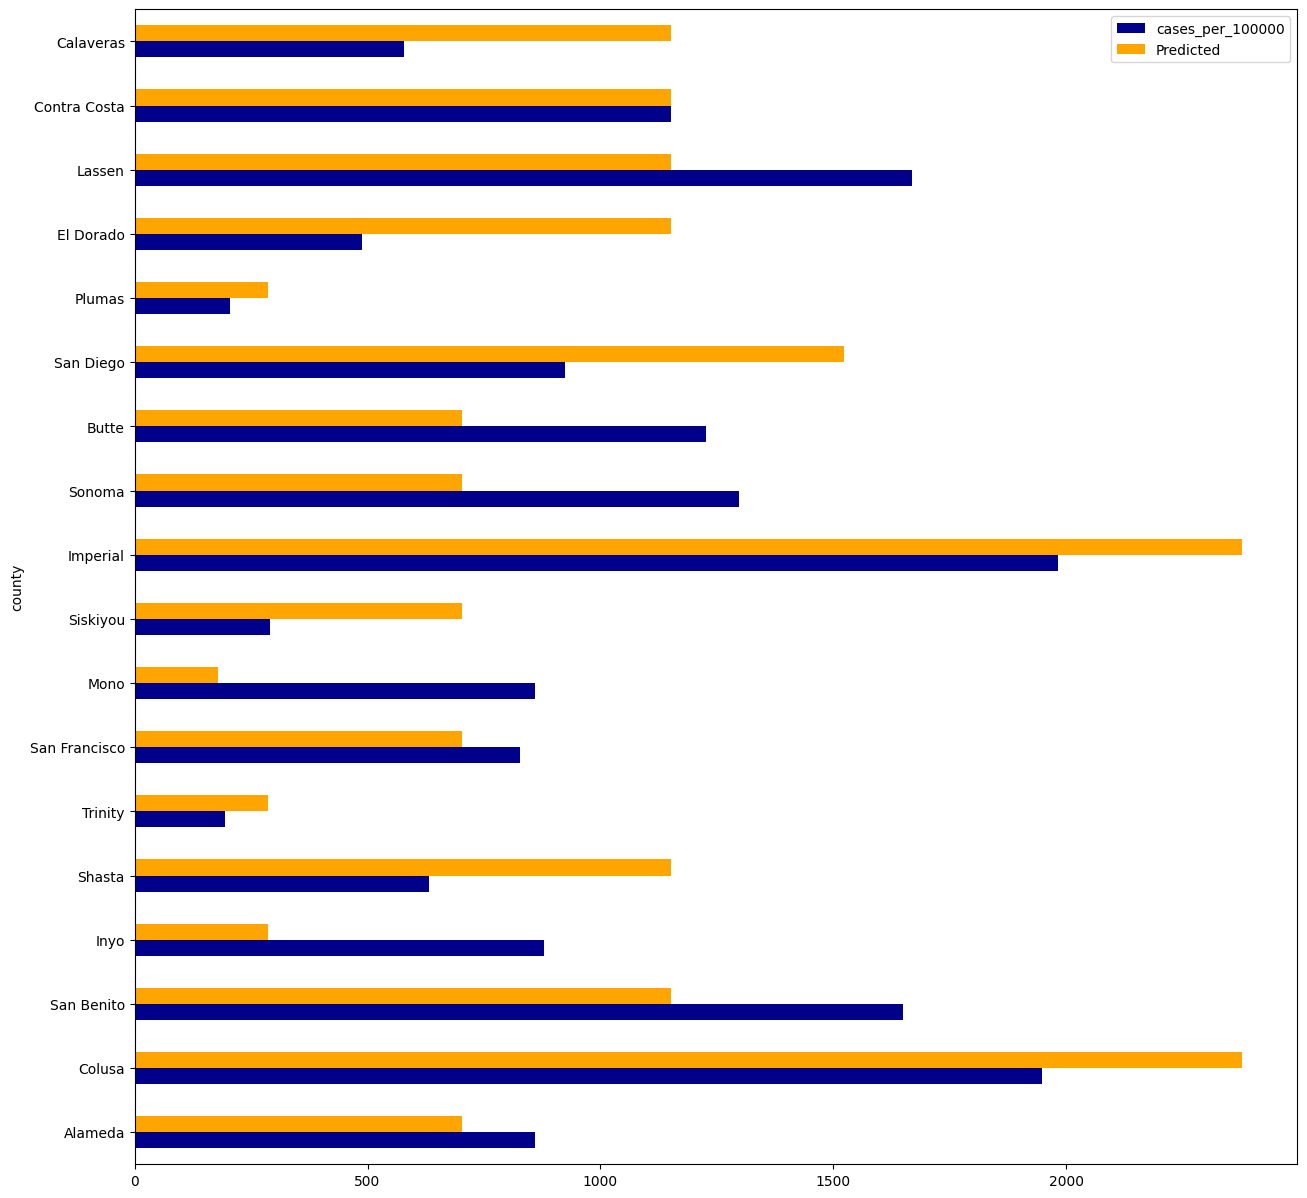

In [28]:
#This puts into a single dataframe our predictions with our original test labels 
pred_vs_test_2020 = pd.concat([S2020_testing_labels.reset_index(drop=True),S2020_labels_preds_df.reset_index(drop=True)],axis=1)

#This plots the data in a barchart per county
pred_vs_test_plot = pred_vs_test_2020.plot.barh(color={"Predicted": "orange", "cases_per_100000": "darkblue"},x="county",figsize=(15,15), yticks=np.arange(0,4000,500))

##**Step 8) Lets try using our Summer 2020 Tree model to predict 2021 Data**



In [29]:
HTML('<iframe src="https://player.vimeo.com/video/714289135?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/714289135">Video Recap</a> from <a href="https://vimeo.com/showcase/9557969/video/714289135">Introduction to Machine Learning: Decision Trees</a> on <a href="https://vimeo.com">Vimeo</a>.</p>')

**A)** Let's Load the Features information for the same 18 counties, but this time for Summer 2021.

In [30]:
#Importing Summer 2021 Data to predict using "Summer2020 Model"
S2021_testing_features = pd.read_csv("https://raw.githubusercontent.com/MarcMachineLearning/Workshop_1/main/Datasets/S2021_test_features.csv")

# make predictions for Summer 2021 Data
S2021_labels_pred = dtr_summer2020.predict(S2021_testing_features.drop(columns=["county"]))

**B)** Let's now load the Actual 2021 Summer data and see how our 2020 Decision Tree Model Performed this time.

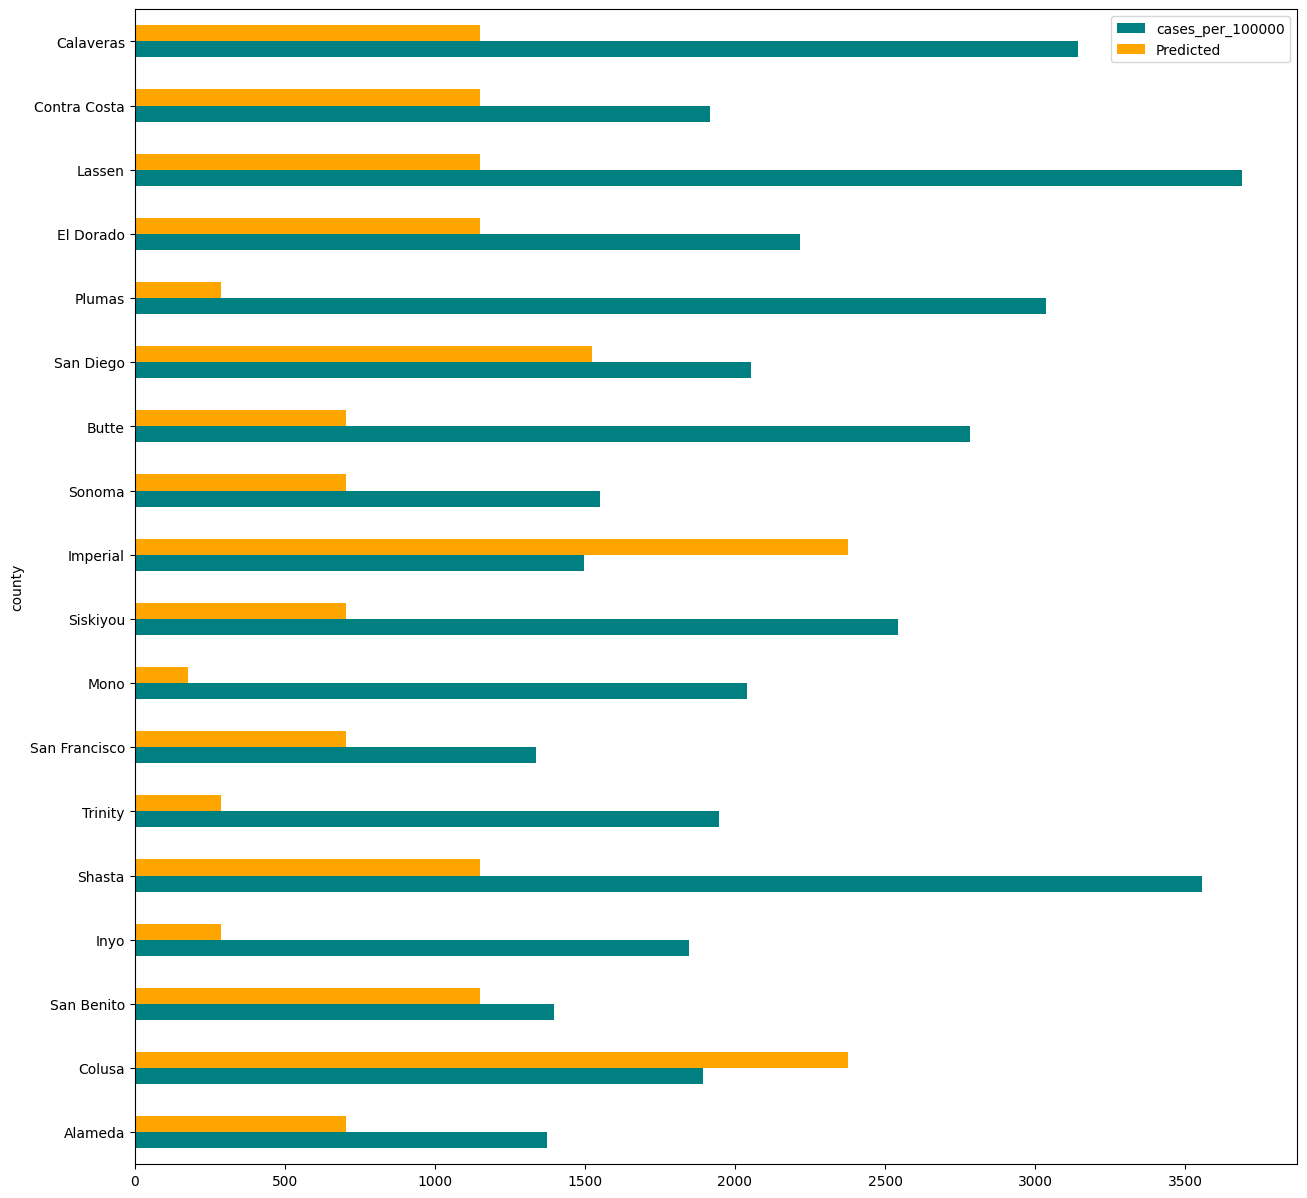

In [31]:
#Importing Labels of Summer 2021 Data to check accuracy of "Summer2020 Model" predicting Summer2021 Data
S2021_testing_labels = pd.read_csv("https://raw.githubusercontent.com/MarcMachineLearning/Workshop_1/main/Datasets/S2021_test_labels.csv")

# This turns our predictions (which is currently an array) into a dataframe 
S2021_labels_pred_df = pd.DataFrame(S2021_labels_pred, columns=["Predicted"])

# This puts into a single dataframe our predictions with our original test labels 
pred_vs_test_2021 = pd.concat([S2021_testing_labels.reset_index(drop=True),S2021_labels_pred_df.reset_index(drop=True)],axis=1)

#Visualize performance for Summer 2021 predictions
pred_vs_test_plot = pred_vs_test_2021.plot.barh(color={"Predicted": "orange", "cases_per_100000": "teal"},x="county",figsize=(15,15), yticks=np.arange(0,4000,500))

## **Checking Errors made by 2020 Decision Tree on Summer 2020 vs Summer 2021 Covid Data**

We can see that for 2020 the histogram (Blue) of errors is closer overall to 0 ranging from -500 to 500, whereas the histogram of errors for 2021 (Orange) are all over the place ranging from 1000 to 2500

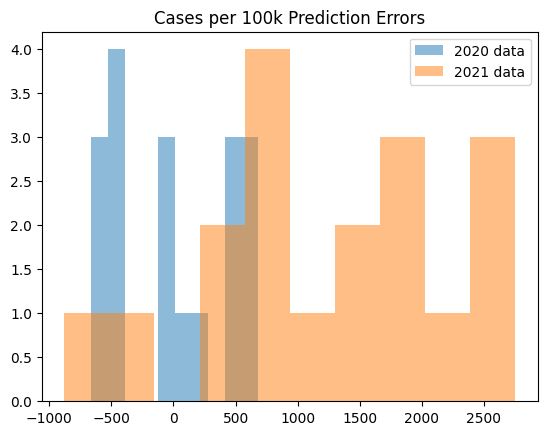

In [32]:
# Create columns holding error between actual rate vs. predicted rate
pred_vs_test_2020['residual'] = pred_vs_test_2020['cases_per_100000'] - pred_vs_test_2020['Predicted']
pred_vs_test_2021['residual'] = pred_vs_test_2021['cases_per_100000'] - pred_vs_test_2021['Predicted']

# Plot errors on histogram
plt.title('Cases per 100k Prediction Errors')
plt.hist(pred_vs_test_2020['residual'], alpha=0.5, label='2020 data')
plt.hist(pred_vs_test_2021['residual'], alpha=0.5, label='2021 data')
plt.legend(loc='upper right')
plt.show()

A more formal way to calculate the performance for the model is to calculate the RMSE (Root Mean Square Error). Feel free to browse the 

**Quant. Comparison of 2020 DT Model Performance for (2020 vs 2021) Data** for more details about this particular metric

In [33]:
# this prints the RMSE value for the performance of the model using 2020 Data
print(f"RMSE on 2020 test set: {mean_squared_error(pred_vs_test_2020['cases_per_100000'], pred_vs_test_2020['Predicted'], squared=False)}")

# this prints the RMSE value for the performance of the model using 2020 Data
print(f"RMSE on 2021 test set: {mean_squared_error(pred_vs_test_2021['cases_per_100000'], pred_vs_test_2020['Predicted'], squared=False)}")

RMSE on 2020 test set: 466.63833286828844
RMSE on 2021 test set: 1577.3791091382348


#**Let's make a NEW Decision Tree for Summer 2021 and improve our predictions!**

In order to expedite the making of the NEW Decision Tree, we can skip a few steps, and only copy-paste the required lines of code.

*   You DON'T need to copy-paste the comments from the orginal code (The green text that is preceded by "#"). 
*   Follow instead the instructions written as a comment in this following exercise to create a NEW Decision Tree for Summer 2021 Data.


##**1) Repeat Step 2A (Loading 2021 Training Data)**

SKIP:

- Step 1, because there is no need to import our libraries again, we usually only import once per notebook.

#####**NOTES: When you copy-paste code, don't forget to change 2020 into 2021, everytime you see it, including the links!!** 

In [34]:
#Copy-paste the code from Step 2A that will load our Summer 2021 training data
S2021_training= pd.read_csv("https://raw.githubusercontent.com/MarcMachineLearning/Workshop_1/main/Datasets/S2021_training.csv")

##**2) Repeat Step 3A (Separate Training Data into LABEL and FEATURES)**
SKIP:
- Steps 3B and 3C, since this step was only done to allow you to see what the labels look like once we separated it from our main training data.

#####**NOTE: When you copy-paste code, don't forget to change 2020 into 2021, everytime you see it!!** 

In [35]:
#Copy-paste the code from Step 3A that separates the FEATURES & LABEL from the training data 
S2021_training_labels = S2021_training["cases_per_100000"]
S2021_training_features = S2021_training.drop(columns=["county","cases_per_100000"])

##**3) Repeat steps 4A and 4B (Create your Decision Tree and Train it!)**


#####**NOTE: When you copy-paste code, don't forget to change 2020 into 2021, everytime you see it!!** 

In [36]:
# Copy-paste the Code from Step 4A that will allow us to create our NEW Decision Tree
dtr_summer2021 = DecisionTreeRegressor(random_state = 1, max_depth= 3)

In [37]:
# Copy-paste the Code from step 4B that will train our NEW Decision Tree
dtr_summer2021 = dtr_summer2021.fit(S2021_training_features, S2021_training_labels)

##**4) Repeat step 5 (Visualize your 2021 Decision Tree)**

#####**NOTE: When you copy-paste code, don't forget to change 2020 into 2021, everytime you see it!!** 

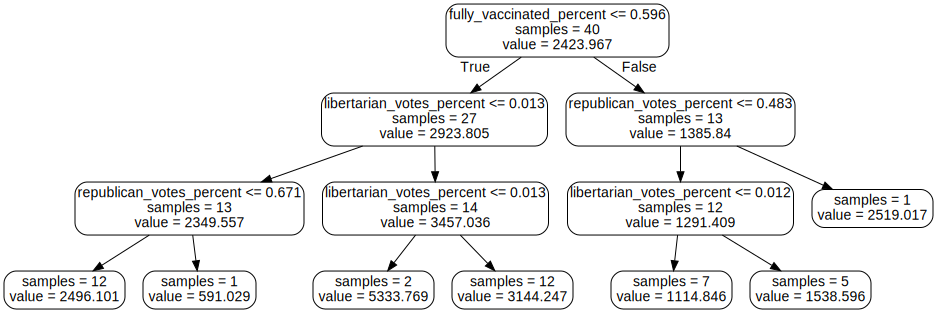

In [38]:
# Copy-paste the code from step 5 that will let you see the New 2021 Decision Tree
dtr_summer2021_dot = tree.export_graphviz(dtr_summer2021, out_file=None, 
                                feature_names=S2021_training_features.columns,  
                                filled=False, rounded=True, impurity=False)

# Draw graph
dtr_graph = graphviz.Source(dtr_summer2021_dot, format="png") 
dtr_graph

##**5) Repeat step 6A, 6B, 6C (Load Testing Data and make your Predictions)**

#####**NOTE: When you copy-paste code, don't forget to change 2020 into 2021, everytime you see it!!** 

In [39]:
# Copy-paste the code from step 6A to load and see your Summer 2021 Testing data
S2021_testing_features = pd.read_csv("https://raw.githubusercontent.com/MarcMachineLearning/Workshop_1/main/Datasets/S2021_test_features.csv")
S2021_testing_features

,county,population,partially_vaccinated_percent,fully_vaccinated_percent,2020_Unemployment_Rate,democrat_votes_percent,green_votes_percent,republican_votes_percent,libertarian_votes_percent,other_votes_percent
0,Alameda,1685886,0.055480,0.717004,0.119655,0.802082,0.006057,0.177009,0.008175,0.006679
1,Colusa,22593,0.077432,0.512579,0.134429,0.406858,0.003140,0.572667,0.010175,0.007160
2,San Benito,64022,0.088242,0.623553,0.111465,0.611446,0.003156,0.367326,0.011967,0.006105
3,Inyo,18453,0.052696,0.519381,0.093413,0.488612,0.004745,0.487136,0.013496,0.006010
4,Shasta,177925,0.074238,0.391501,0.099861,0.322824,0.003960,0.654138,0.013742,0.005337
5,Trinity,13354,0.057767,0.406702,0.080260,0.455504,0.007988,0.509347,0.018693,0.008468
6,San Francisco,892280,0.051856,0.760621,0.110087,0.852561,0.006270,0.127193,0.007438,0.006538
7,Mono,13961,0.053408,0.585650,0.137376,0.595577,0.006233,0.372959,0.018700,0.006530
8,Siskiyou,43956,0.067846,0.419063,0.103044,0.408700,0.004942,0.566207,0.013548,0.006604
9,Imperial,191649,0.148167,0.695948,0.265077,0.611141,0.004124,0.367393,0.006873,0.010468


In [40]:
# Copy-paste the code from step 6B to drop the county out of the testing Data and make your predictions!
S2021_features_test_nocounty = S2021_testing_features.drop(columns=["county"])
S2021_labels_pred2 = dtr_summer2021.predict(S2021_features_test_nocounty)

In [41]:
# Copy-paste the code from step 6C to look at the labels that our new model has predicted
S2021_labels_pred2_df = pd.DataFrame(S2021_labels_pred2, columns=["Predicted"])
S2021_labels_pred2_df = pd.concat([S2021_testing_features["county"].reset_index(drop=True),S2021_labels_pred2_df.reset_index(drop=True)],axis=1)
S2021_labels_pred2_df.round(3)

,county,Predicted
0,Alameda,1114.846
1,Colusa,2496.101
2,San Benito,1538.596
3,Inyo,3144.247
4,Shasta,3144.247
5,Trinity,3144.247
6,San Francisco,1114.846
7,Mono,3144.247
8,Siskiyou,3144.247
9,Imperial,1114.846


##**6) Repeat step 7A, 7B (Check the Accuracy of the Predictions of the new Model Created)**

#####**NOTE: When you copy-paste code, don't forget to change 2020 into 2021, everytime you see it!!** 

In [42]:
# Copy-paste the code from Step 7A to load our ACTUAL 2021 Labels and drop the county since it's not part of the labels per se
S2021_testing_labels = pd.read_csv("https://raw.githubusercontent.com/MarcMachineLearning/Workshop_1/main/Datasets/S2021_test_labels.csv")
S2021_testing_labels = S2021_testing_labels.drop(columns=["county"])

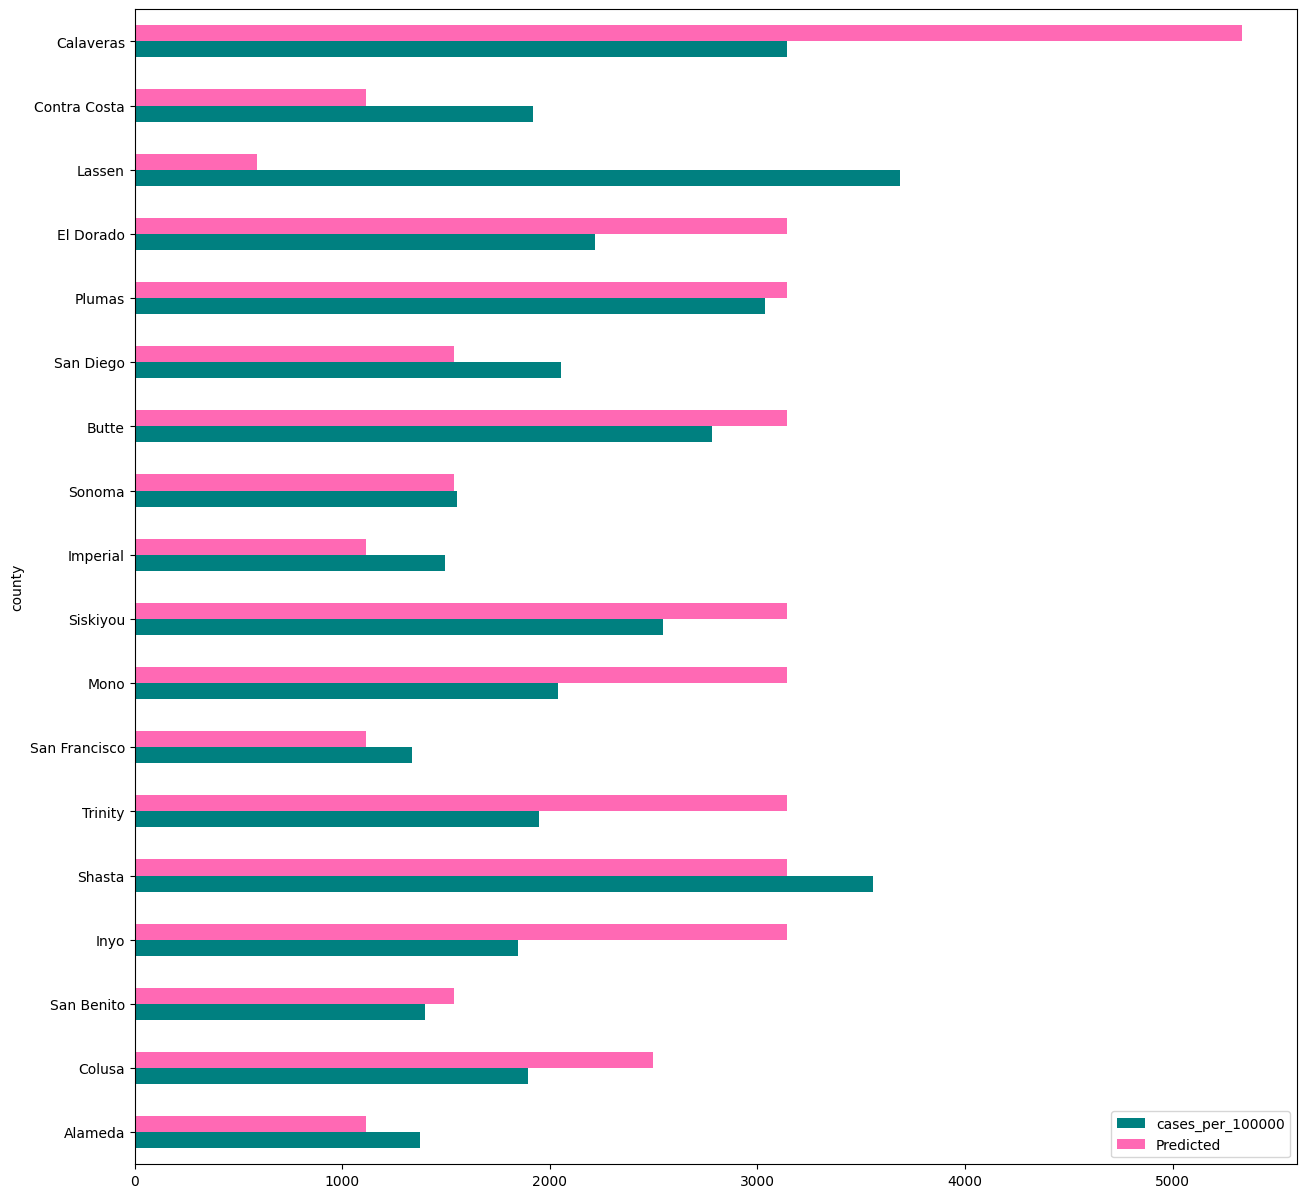

In [43]:
# Copy-paste the code from Step 7B to make a bargraph and inspect the Accuracy of your new 2021 Decision Tree Model
pred_vs_test_2021_v2 = pd.concat([S2021_testing_labels.reset_index(drop=True),S2021_labels_pred2_df.reset_index(drop=True)],axis=1)
pred_vs_test_plot_v2 = pred_vs_test_2021_v2.plot.barh(color={"Predicted": "hotpink", "cases_per_100000": "teal"},x="county",figsize=(15,15), yticks=np.arange(0,4000,500))

## **Comparison of Performance of 2020 and 2021 Tree Models on 2021 Data.**

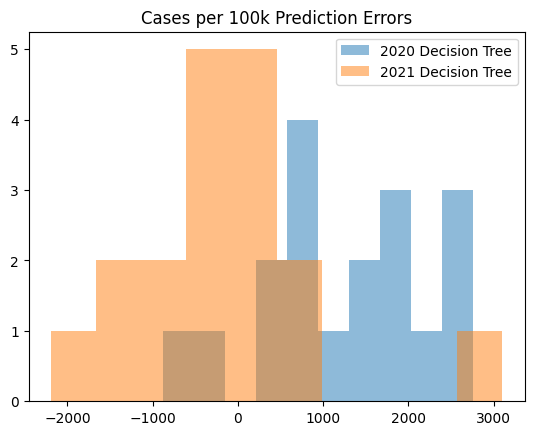

In [47]:
# Create columns holding error between actual rate vs. predicted rate
pred_vs_test_2021['residual'] = pred_vs_test_2021['cases_per_100000'] - pred_vs_test_2021['Predicted'] # old model
pred_vs_test_2021_v2['residual'] = pred_vs_test_2021_v2['cases_per_100000'] - pred_vs_test_2021_v2['Predicted'] # new model

# Plot errors on histogram
plt.title('Cases per 100k Prediction Errors')
plt.hist(pred_vs_test_2021['residual'], alpha=0.5, label='2020 Decision Tree')
plt.hist(pred_vs_test_2021_v2['residual'], alpha=0.5, label='2021 Decision Tree')
plt.legend(loc='upper right')
plt.show()

**A) Comparing Predictions for Summer 2021 using 2020 Tree Model vs 2021 Tree Model**

In [48]:
# this prints the RMSE value for the performance of the model using 2020 Data
print(f"RMSE using 2020 Model on 2021 Data: {mean_squared_error(pred_vs_test_2021['cases_per_100000'], pred_vs_test_2021['Predicted'], squared=False)}")

# this prints the RMSE value for the performance of the model using 2020 Data
print(f"RMSE using 2021 Model on 2021 Data: {mean_squared_error(pred_vs_test_2021_v2['cases_per_100000'], pred_vs_test_2021_v2['Predicted'], squared=False)}")

RMSE using 2020 Model on 2021 Data: 1577.3791091382348
RMSE using 2021 Model on 2021 Data: 1100.8317091044223


In conclusion we can see that the errors in our new 2021 Tree Model Errors are around 0, but still has a wide spread whereas the 2020 Tree errors are not centered on 0. This could reflect various counties not adopting at the same speed the inclusion of vaccines during COVID and we can see that overall the predictions made by the 2020 Tree on 2020 Data were more accurate (*RMSE = 466.638*) than the 2021 Tree on 2021 Data (*RMSE = 1100.831*). However we can still say that Using the 2021 Tree on 2021 Data was more accurate than using our first 2020 Tree Model (*RMSE = 1577.379*).